# 1. Loading Libraries #

In [1]:
# Loading Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings

from sklearn import ensemble
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV, train_test_split
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

pd.set_option('display.max_columns', 100)
warnings.filterwarnings('ignore')
%matplotlib inline

# 2. First look at the Data

### 2.1 EPA Data ###

In [2]:
# Reading all EPA data saved in csv format

input_path = "F:/Data Science/Markit Test/"

df_2020 = pd.read_csv(input_path+"2020.csv")
df_2019 = pd.read_csv(input_path+"2019.csv")
df_2018 = pd.read_csv(input_path+"2018.csv")
df_2017 = pd.read_csv(input_path+"2017.csv")
df_2016 = pd.read_csv(input_path+"2016.csv")
df_2015 = pd.read_csv(input_path+"2015.csv")
df_2014 = pd.read_csv(input_path+"2014.csv")
df_2013 = pd.read_csv(input_path+"2013.csv")
df_2012 = pd.read_csv(input_path+"2012.csv")
df_2011 = pd.read_csv(input_path+"2011.csv")
df_2010 = pd.read_csv(input_path+"2010.csv")

In [3]:
#checking shape
shape = [df_2020, df_2019, df_2018, df_2017, df_2016, df_2015, df_2014, df_2013, df_2012, df_2011, df_2010]

for s in shape:
    print(s.shape)

(4450, 67)
(4719, 67)
(4727, 67)
(4685, 67)
(4650, 67)
(4832, 67)
(4764, 67)
(4261, 64)
(4144, 64)
(3762, 64)
(3277, 64)


In [4]:
# dropping columns to make dataframes consistent 

df_2020 = df_2020.drop(['DT-Inertia Work Ratio Rating','DT-Absolute Speed Change Ratg', 'DT-Energy Economy Rating'], axis=1)
df_2019 = df_2019.drop(['DT-Inertia Work Ratio Rating','DT-Absolute Speed Change Ratg', 'DT-Energy Economy Rating'], axis=1)
df_2018 = df_2018.drop(['DT-Inertia Work Ratio Rating','DT-Absolute Speed Change Ratg', 'DT-Energy Economy Rating'], axis=1)
df_2017 = df_2017.drop(['DT-Inertia Work Ratio Rating','DT-Absolute Speed Change Ratg', 'DT-Energy Economy Rating'], axis=1)
df_2016 = df_2016.drop(['DT-Inertia Work Ratio Rating','DT-Absolute Speed Change Ratg', 'DT-Energy Economy Rating'], axis=1)
df_2015 = df_2015.drop(['DT-Inertia Work Ratio Rating','DT-Absolute Speed Change Ratg', 'DT-Energy Economy Rating'], axis=1)
df_2014 = df_2014.drop(['DT-Inertia Work Ratio Rating','DT-Absolute Speed Change Ratg', 'DT-Energy Economy Rating'], axis=1)

**Key Notes**

On close observation, below are the additional columns present in 2014 onwards data. There are 2 key reasons to drop these 3 columns :

1) There are lof of mising values in them, more than 50%

2) These columns are not present in the prior to 2014 data

To make the overall data consistent, dropping these columns.

In [5]:
# Concatenate DFs to combine EPA dataset

frames = [df_2020, df_2019, df_2018, df_2017, df_2016, df_2015, df_2014, df_2013, df_2012, df_2011, df_2010]

df_all = pd.concat(frames)
df_all.head()

,Model Year,Vehicle Manufacturer Name,Veh Mfr Code,Represented Test Veh Make,Represented Test Veh Model,Test Vehicle ID,Test Veh Configuration #,Test Veh Displacement (L),Actual Tested Testgroup,Vehicle Type,Rated Horsepower,# of Cylinders and Rotors,Engine Code,Tested Transmission Type Code,Tested Transmission Type,# of Gears,Transmission Lockup?,Drive System Code,Drive System Description,Transmission Overdrive Code,Transmission Overdrive Desc,Equivalent Test Weight (lbs.),Axle Ratio,N/V Ratio,Shift Indicator Light Use Cd,Shift Indicator Light Use Desc,Test Number,Test Originator,Analytically Derived FE?,ADFE Test Number,ADFE Total Road Load HP,ADFE Equiv. Test Weight (lbs.),ADFE N/V Ratio,Test Procedure Cd,Test Procedure Description,Test Fuel Type Cd,Test Fuel Type Description,Test Category,THC (g/mi),CO (g/mi),CO2 (g/mi),NOx (g/mi),PM (g/mi),CH4 (g/mi),N2O (g/mi),RND_ADJ_FE,FE_UNIT,FE Bag 1,FE Bag 2,FE Bag 3,FE Bag 4,Target Coef A (lbf),Target Coef B (lbf/mph),Target Coef C (lbf/mph**2),Set Coef A (lbf),Set Coef B (lbf/mph),Set Coef C (lbf/mph**2),Aftertreatment Device Cd,Aftertreatment Device Desc,Police - Emergency Vehicle?,Averaging Group ID,Averaging Weighting Factor,Averaging Method Cd,Averging Method Desc
0,2020,aston martin,ASX,Aston Martin,DB11,500TT5148,0,5.2,HASXV05.2AM5,Car,600,12.0,AE31/,SA,Semi-Automatic,8,Y,R,"2-Wheel Drive, Rear",2,Top gear ratio < 1,4500,2.70,22.2,1,Not eqipped,HASX10045047,MFR,No,NaN,NaN,NaN,NaN,21,Federal fuel 2-day exhaust (w/can load),61,Tier 2 Cert Gasoline,FTP,0.024700,0.418000,466.87,0.0249,NaN,0.0076,0.0045,18.8,MPG,17.8390,17.9850,21.6350,NaN,40.94,0.0169,0.0271,6.81,0.0807,0.0245,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
1,2020,aston martin,ASX,Aston Martin,DB11,500TT5148,0,5.2,HASXV05.2AM5,Car,600,12.0,AE31/,SA,Semi-Automatic,8,Y,R,"2-Wheel Drive, Rear",2,Top gear ratio < 1,4500,2.70,22.2,1,Not eqipped,HASX10045048,MFR,No,NaN,NaN,NaN,NaN,3,HWFE,61,Tier 2 Cert Gasoline,HWY,0.001155,0.067334,285.00,0.0110,NaN,NaN,NaN,30.9,MPG,NaN,NaN,NaN,NaN,40.94,0.0169,0.0271,6.81,0.0807,0.0245,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
2,2020,aston martin,ASX,Aston Martin,DB11 V8,562TT5348,0,4.0,JASXV04.0AES,Car,503,8.0,177950,SA,Semi-Automatic,8,Y,R,"2-Wheel Drive, Rear",2,Top gear ratio < 1,4500,2.70,22.2,1,Not eqipped,JASX10050824,MFR,No,NaN,NaN,NaN,NaN,21,Federal fuel 2-day exhaust (w/can load),61,Tier 2 Cert Gasoline,FTP,0.026500,0.070000,386.66,0.0290,NaN,0.0054,0.0064,22.7,MPG,22.7357,21.7727,24.8773,NaN,40.94,0.0169,0.0271,11.26,0.0919,0.0251,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
3,2020,aston martin,ASX,Aston Martin,DB11 V8,562TT5348,0,4.0,JASXV04.0AES,Car,503,8.0,177950,SA,Semi-Automatic,8,Y,R,"2-Wheel Drive, Rear",2,Top gear ratio < 1,4500,2.70,22.2,1,Not eqipped,JASX10050825,MFR,No,NaN,NaN,NaN,NaN,3,HWFE,61,Tier 2 Cert Gasoline,HWY,0.000500,0.030000,259.74,0.0020,NaN,NaN,NaN,33.8,MPG,NaN,NaN,NaN,NaN,40.94,0.0169,0.0271,11.26,0.0919,0.0251,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
4,2020,aston martin,ASX,Aston Martin,DBS,7002PT7056,0,5.2,KASXV05.2AM5,Car,715,12.0,AE31/,SA,Semi-Automatic,8,Y,R,"2-Wheel Drive, Rear",2,Top gear ratio < 1,4500,2.93,23.0,1,Not eqipped,KASX10055440,MFR,No,NaN,NaN,NaN,NaN,21,Federal fuel 2-day exhaust (w/can load),61,Tier 2 Cert Gasoline,FTP,0.042200,0.984800,499.69,0.0262,NaN,0.0109,0.0000,17.7,MPG,16.9255,16.7052,20.9239,NaN,40.94,0.0169,0.0271,6.81,0.0807,0.0245,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging


### 2.2 NHTSA Data ###

In [6]:
# Reading NHTSA data

veh = pd.read_csv(input_path+"veh.psv", sep='|')
veh.columns = veh.columns.str.replace(' ', '')

In [7]:
# Filtering non-blank values in NHTSA dataset
veh = veh[~veh["YEAR"].isnull()]

# Converting Year from float to int to match EPA dataset
veh["YEAR"] = veh["YEAR"].astype(int)

In [8]:
# Checking no blank values in Year column
veh["YEAR"].unique()

array([1980, 1978, 1976,    0, 1979, 1975, 1971, 1972, 1985, 1977, 1974,
       1973, 1981, 1965, 1966, 1969, 1982, 1970, 1983, 1984, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

# 3. Feature Engineering

In [9]:
# on EPA dataset

dic = {"AM": "A", "AMS": "A", "SA": "A", "A": "A", "M": "M", "CVT": "C", "SCV": "C", "OT": "O"}

df_all['Trans Type'] = df_all['Tested Transmission Type Code'].map(dic)
df_all['Represented Test Veh Make'] = df_all['Represented Test Veh Make'].str.upper()
df_all['Represented Test Veh Model'] = df_all['Represented Test Veh Model'].str.upper()

In [10]:
# on NHTSA dataset

veh['Drive F/R/A']= veh['TRANSM'].str[-1]
veh['TR TYPE']= veh['TRANSM'].str[0]

In [11]:
# Merging both the dataframes

epa_key = ['Model Year', 'Represented Test Veh Make', 'Represented Test Veh Model', 'Trans Type', 'Drive System Code']
nhtsa_key = ['YEAR', 'MAKED', 'MODELD', 'TR TYPE', 'Drive F/R/A']

new_df = pd.merge(df_all, veh,  how='left', left_on = epa_key, right_on = nhtsa_key)

In [12]:
# checking the list of columns 

list(new_df.columns)

['Model Year',
 'Vehicle Manufacturer Name',
 'Veh Mfr Code',
 'Represented Test Veh Make',
 'Represented Test Veh Model',
 'Test Vehicle ID',
 'Test Veh Configuration #',
 'Test Veh Displacement (L)',
 'Actual Tested Testgroup',
 'Vehicle Type',
 'Rated Horsepower',
 '# of Cylinders and Rotors',
 'Engine Code',
 'Tested Transmission Type Code',
 'Tested Transmission Type',
 '# of Gears',
 'Transmission Lockup?',
 'Drive System Code',
 'Drive System Description',
 'Transmission Overdrive Code',
 'Transmission Overdrive Desc',
 'Equivalent Test Weight (lbs.)',
 'Axle Ratio',
 'N/V Ratio',
 'Shift Indicator Light Use Cd',
 'Shift Indicator Light Use Desc',
 'Test Number',
 'Test Originator',
 'Analytically Derived FE?',
 'ADFE Test Number',
 'ADFE Total Road Load HP',
 'ADFE Equiv. Test Weight (lbs.)',
 'ADFE N/V Ratio',
 'Test Procedure Cd',
 'Test Procedure Description',
 'Test Fuel Type Cd',
 'Test Fuel Type Description',
 'Test Category',
 'THC (g/mi)',
 'CO (g/mi)',
 'CO2 (g/mi)',
 

# 4. Handling Missing Values #

In [13]:
# custom function to produce missing values statistics

def missing_info(df):
    
    missing_total = df.isnull().sum().sort_values(ascending=False)
    percent_1 = df.isnull().sum()/df.isnull().count()*100
    percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
    missing_data = pd.concat([missing_total, percent_2], axis=1, keys=['Total Missing', 'Missing %'])
    
    return missing_data

In [14]:
pd.set_option('display.max_rows', 200)

missing_info(new_df)

,Total Missing,Missing %
AX3,52875,100.0
FE Bag 4,51719,97.8
BMPENG,51389,97.2
CURBWT,51238,96.9
APLENG,50991,96.4
Averaging Weighting Factor,50337,95.2
Averaging Group ID,50337,95.2
MODDSC,49849,94.2
SILENG,49444,93.5
VEHCOM,49321,93.2


**Key Notes**

Columns having more than 50% of missing data is difficult to compute due to lack of information. Hence, we will drop these columns and proceed further.

In [15]:
mdf = missing_info(new_df)

relevant_cols = list(mdf[mdf["Missing %"]<50.0].index)
relevant_cols

['CH4 (g/mi)',
 'NOx (g/mi)',
 'THC (g/mi)',
 'CO (g/mi)',
 'Aftertreatment Device Cd',
 'Aftertreatment Device Desc',
 '# of Cylinders and Rotors',
 'CO2 (g/mi)',
 'RND_ADJ_FE',
 '# of Gears',
 'Transmission Overdrive Desc',
 'Transmission Overdrive Code',
 'Drive System Description',
 'Drive System Code',
 'Transmission Lockup?',
 'Vehicle Manufacturer Name',
 'Veh Mfr Code',
 'Represented Test Veh Make',
 'Represented Test Veh Model',
 'Tested Transmission Type',
 'Axle Ratio',
 'Test Vehicle ID',
 'Tested Transmission Type Code',
 'Engine Code',
 'Test Veh Configuration #',
 'Test Veh Displacement (L)',
 'Actual Tested Testgroup',
 'Vehicle Type',
 'Rated Horsepower',
 'Equivalent Test Weight (lbs.)',
 'Test Fuel Type Cd',
 'N/V Ratio',
 'Shift Indicator Light Use Cd',
 'Trans Type',
 'Averging Method Desc',
 'Averaging Method Cd',
 'Police - Emergency Vehicle?',
 'Set Coef C (lbf/mph**2)',
 'Set Coef B (lbf/mph)',
 'Set Coef A (lbf)',
 'Target Coef C (lbf/mph**2)',
 'Target Coef B

#### Key Notes

1. After research and close observation, I realized the below columns in excl_cols have insignificant correlation with our target variable 'Equivalent Test Weight (lbs.)'. Hence, I have removed them to avoid overfitting.

2. I have also tested them using statistical approach and observed weak correlation.

3. Hence, excluding these variables is a good choice.

In [16]:
# exclude these columns due to weak correlation

excl_cols = ['Aftertreatment Device Cd','Aftertreatment Device Desc', 'RND_ADJ_FE', 'Transmission Overdrive Desc',
'Transmission Overdrive Code', 'Drive System Description', 'Transmission Lockup?', 'Vehicle Manufacturer Name','Veh Mfr Code',
'Test Vehicle ID', 'Tested Transmission Type', 'Engine Code', 'Test Veh Configuration #','FE_UNIT',
 'Test Category', 'Test Fuel Type Description', 'Test Procedure Description', 'Test Procedure Cd', 'Analytically Derived FE?',
 'Test Originator', 'Test Number', 'Shift Indicator Light Use Desc', 'Averging Method Desc','Averaging Method Cd',
'Police - Emergency Vehicle?', 'Shift Indicator Light Use Cd', 'Actual Tested Testgroup', 'Tested Transmission Type Code']

### Performing Statistical Test to confirm hypothesis

In [17]:
check = ['Equivalent Test Weight (lbs.)','Aftertreatment Device Cd','Aftertreatment Device Desc', 'RND_ADJ_FE', 'Transmission Overdrive Desc',
'Transmission Overdrive Code', 'Drive System Description', 'Transmission Lockup?', 'Vehicle Manufacturer Name','Veh Mfr Code',
'Test Vehicle ID', 'Tested Transmission Type', 'Engine Code', 'Test Veh Configuration #','FE_UNIT',
 'Test Category', 'Test Fuel Type Description', 'Test Procedure Description', 'Test Procedure Cd', 'Analytically Derived FE?',
 'Test Originator', 'Test Number', 'Shift Indicator Light Use Desc', 'Averging Method Desc','Averaging Method Cd',
'Police - Emergency Vehicle?', 'Shift Indicator Light Use Cd', 'Actual Tested Testgroup', 'Tested Transmission Type Code']

In [18]:
df_check = new_df[check]
matrix = df_check.corr()

matrix.loc['Equivalent Test Weight (lbs.)',].sort_values(ascending=False)

Equivalent Test Weight (lbs.)    1.000000
Test Veh Configuration #         0.106887
Transmission Overdrive Code     -0.005775
RND_ADJ_FE                      -0.007663
Test Procedure Cd               -0.010296
Shift Indicator Light Use Cd    -0.054256
Name: Equivalent Test Weight (lbs.), dtype: float64

Low Correlation confirmed. Let's proceed further!

In [19]:
mod_df = new_df[relevant_cols]

#removing the less correlated features
mod_df = mod_df[[col for col in mod_df.columns if col not in excl_cols]]
mod_df.head()

,CH4 (g/mi),NOx (g/mi),THC (g/mi),CO (g/mi),# of Cylinders and Rotors,CO2 (g/mi),# of Gears,Drive System Code,Represented Test Veh Make,Represented Test Veh Model,Axle Ratio,Test Veh Displacement (L),Vehicle Type,Rated Horsepower,Equivalent Test Weight (lbs.),Test Fuel Type Cd,N/V Ratio,Trans Type,Set Coef C (lbf/mph**2),Set Coef B (lbf/mph),Set Coef A (lbf),Target Coef C (lbf/mph**2),Target Coef B (lbf/mph),Target Coef A (lbf),Model Year
0,0.0076,0.0249,0.024700,0.418000,12.0,466.87,8,R,ASTON MARTIN,DB11,2.70,5.2,Car,600,4500,61,22.2,A,0.0245,0.0807,6.81,0.0271,0.0169,40.94,2020
1,NaN,0.0110,0.001155,0.067334,12.0,285.00,8,R,ASTON MARTIN,DB11,2.70,5.2,Car,600,4500,61,22.2,A,0.0245,0.0807,6.81,0.0271,0.0169,40.94,2020
2,0.0054,0.0290,0.026500,0.070000,8.0,386.66,8,R,ASTON MARTIN,DB11 V8,2.70,4.0,Car,503,4500,61,22.2,A,0.0251,0.0919,11.26,0.0271,0.0169,40.94,2020
3,NaN,0.0020,0.000500,0.030000,8.0,259.74,8,R,ASTON MARTIN,DB11 V8,2.70,4.0,Car,503,4500,61,22.2,A,0.0251,0.0919,11.26,0.0271,0.0169,40.94,2020
4,0.0109,0.0262,0.042200,0.984800,12.0,499.69,8,R,ASTON MARTIN,DBS,2.93,5.2,Car,715,4500,61,23.0,A,0.0245,0.0807,6.81,0.0271,0.0169,40.94,2020


In [20]:
# List of relevant columns

sorted(list(mod_df.columns))

['# of Cylinders and Rotors',
 '# of Gears',
 'Axle Ratio',
 'CH4 (g/mi)',
 'CO (g/mi)',
 'CO2 (g/mi)',
 'Drive System Code',
 'Equivalent Test Weight (lbs.)',
 'Model Year',
 'N/V Ratio',
 'NOx (g/mi)',
 'Rated Horsepower',
 'Represented Test Veh Make',
 'Represented Test Veh Model',
 'Set Coef A (lbf)',
 'Set Coef B (lbf/mph)',
 'Set Coef C (lbf/mph**2)',
 'THC (g/mi)',
 'Target Coef A (lbf)',
 'Target Coef B (lbf/mph)',
 'Target Coef C (lbf/mph**2)',
 'Test Fuel Type Cd',
 'Test Veh Displacement (L)',
 'Trans Type',
 'Vehicle Type']

In [21]:
# checking missing value in the modified dataframe

handle_missing = missing_info(mod_df)
handle_missing.head(7)

,Total Missing,Missing %
CH4 (g/mi),12839,24.3
NOx (g/mi),5015,9.5
THC (g/mi),4638,8.8
CO (g/mi),4542,8.6
# of Cylinders and Rotors,3055,5.8
CO2 (g/mi),2360,4.5
Test Veh Displacement (L),0,0.0


### Statistical Summary to validate impute hypothesis

In [22]:
# Statistical summary to validate impute methodology

lst = ['CH4 (g/mi)', 'NOx (g/mi)', 'THC (g/mi)', 'CO (g/mi)','# of Cylinders and Rotors', 'CO2 (g/mi)']

for i in lst :
    print(mod_df[i].describe())

count    40056.000000
mean         0.050014
std          4.242880
min          0.000000
25%          0.001759
50%          0.003700
75%          0.007180
max        424.320000
Name: CH4 (g/mi), dtype: float64
count    47880.000000
mean         0.012663
std          0.020324
min          0.000000
25%          0.003600
50%          0.008100
75%          0.015933
max          0.910000
Name: NOx (g/mi), dtype: float64
count    48257.000000
mean         0.024279
std          0.049114
min          0.000000
25%          0.004150
50%          0.012470
75%          0.026000
max          1.205000
Name: THC (g/mi), dtype: float64
count    48353.000000
mean         0.413470
std          4.681061
min          0.000000
25%          0.077272
50%          0.190000
75%          0.418500
max        323.000000
Name: CO (g/mi), dtype: float64
count    49840.000000
mean         5.501926
std          1.773642
min          2.000000
25%          4.000000
50%          6.000000
75%          6.000000
max        

#### I used the median to describe the middle of a set of data to ignore outliers impact, if any. 
#### Advantages of the median: Extreme values (outliers) do not affect the median as strongly as they do the mean.

In [23]:
# Replacing missing values with median value

mod_df['CH4 (g/mi)'].fillna(mod_df['CH4 (g/mi)'].median(), inplace=True)
mod_df['NOx (g/mi)'].fillna(mod_df['NOx (g/mi)'].median(), inplace=True)
mod_df['THC (g/mi)'].fillna(mod_df['THC (g/mi)'].median(), inplace=True)
mod_df['CO (g/mi)'].fillna(mod_df['CO (g/mi)'].median(), inplace=True)
mod_df['# of Cylinders and Rotors'].fillna(mod_df['# of Cylinders and Rotors'].median(), inplace=True)
mod_df['CO2 (g/mi)'].fillna(mod_df['CO2 (g/mi)'].median(), inplace=True)

In [24]:
# Checking missing values 
missing_info(mod_df) 

#good to proceed

,Total Missing,Missing %
Model Year,0,0.0
Test Veh Displacement (L),0,0.0
NOx (g/mi),0,0.0
THC (g/mi),0,0.0
CO (g/mi),0,0.0
# of Cylinders and Rotors,0,0.0
CO2 (g/mi),0,0.0
# of Gears,0,0.0
Drive System Code,0,0.0
Represented Test Veh Make,0,0.0


# 5. Label Encoding

In [25]:
mod_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52895 entries, 0 to 52894
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CH4 (g/mi)                     52895 non-null  float64
 1   NOx (g/mi)                     52895 non-null  float64
 2   THC (g/mi)                     52895 non-null  float64
 3   CO (g/mi)                      52895 non-null  float64
 4   # of Cylinders and Rotors      52895 non-null  float64
 5   CO2 (g/mi)                     52895 non-null  float64
 6   # of Gears                     52895 non-null  int64  
 7   Drive System Code              52895 non-null  object 
 8   Represented Test Veh Make      52895 non-null  object 
 9   Represented Test Veh Model     52895 non-null  object 
 10  Axle Ratio                     52895 non-null  float64
 11  Test Veh Displacement (L)      52895 non-null  float64
 12  Vehicle Type                   52895 non-null 

In [26]:
#dtypes overview

dtype_df = mod_df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,5
1,float64,15
2,object,5


In [27]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in the same column
mod_df['Drive System Code'] = labelencoder.fit_transform(mod_df['Drive System Code'])
mod_df['Represented Test Veh Make'] = labelencoder.fit_transform(mod_df['Represented Test Veh Make'])
mod_df['Represented Test Veh Model'] = labelencoder.fit_transform(mod_df['Represented Test Veh Model'])
mod_df['Vehicle Type'] = labelencoder.fit_transform(mod_df['Vehicle Type'])
mod_df['Trans Type'] = labelencoder.fit_transform(mod_df['Trans Type'])

# 6. Target Variable Analysis

In [28]:
# summary statistics
mod_df['Equivalent Test Weight (lbs.)'].describe()

count    52895.000000
mean      4221.698743
std        845.310197
min       2125.000000
25%       3625.000000
50%       4000.000000
75%       4750.000000
max       8500.000000
Name: Equivalent Test Weight (lbs.), dtype: float64

(array([ 1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.,  8000.,
         9000., 10000.]),
 <a list of 10 Text major ticklabel objects>)

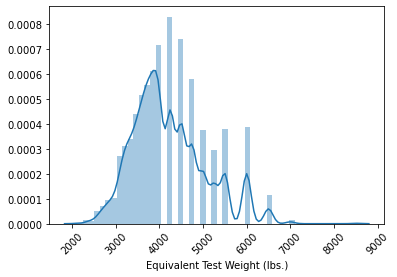

In [29]:
sns.distplot(mod_df['Equivalent Test Weight (lbs.)'])
plt.xticks(rotation=45)

##### Key Observations:

- Deviate from the normal distribution.
- Have appreciable positive skewness.
- Slight peakedness.

Interesting! Let's check other measures.

In [30]:
#skewness and kurtosis
print("Skewness: %f" % mod_df['Equivalent Test Weight (lbs.)'].skew())
print("Kurtosis: %f" % mod_df['Equivalent Test Weight (lbs.)'].kurt())

Skewness: 0.705111
Kurtosis: 0.301917


### Statistical Summary of Numerical Features

In [31]:
mod_df.describe()

,CH4 (g/mi),NOx (g/mi),THC (g/mi),CO (g/mi),# of Cylinders and Rotors,CO2 (g/mi),# of Gears,Drive System Code,Represented Test Veh Make,Represented Test Veh Model,Axle Ratio,Test Veh Displacement (L),Vehicle Type,Rated Horsepower,Equivalent Test Weight (lbs.),Test Fuel Type Cd,N/V Ratio,Trans Type,Set Coef C (lbf/mph**2),Set Coef B (lbf/mph),Set Coef A (lbf),Target Coef C (lbf/mph**2),Target Coef B (lbf/mph),Target Coef A (lbf),Model Year
count,52895.000000,52895.000000,52895.000000,52895.000000,52895.000000,52895.000000,52895.000000,52895.000000,52895.000000,52895.000000,52895.000000,52895.000000,52895.000000,52895.000000,52895.000000,52895.000000,52895.000000,52895.000000,52895.000000,52895.000000,52895.000000,52895.000000,52895.000000,52895.000000,52895.000000
mean,0.038772,0.012230,0.023243,0.394281,5.530693,310.558583,5.924549,2.626581,33.399319,999.925967,3.525822,3.303213,1.142244,270.871292,4221.698743,55.268230,30.996211,0.422649,0.022557,0.112174,12.502199,0.021765,0.266663,37.441594,2015.097514
std,3.692260,0.019383,0.047030,4.476008,1.725576,110.657536,2.120094,1.193831,23.377518,575.925124,0.852155,5.082752,0.602577,128.416656,845.310197,13.267068,18.806450,0.758801,0.025823,0.271062,9.816129,0.006653,0.325357,11.109224,3.047354
min,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.001000,0.000000,1.000000,2125.000000,1.000000,0.000000,0.000000,-0.086800,-1.975200,-99.900000,0.000000,-0.847300,0.000000,2010.000000
25%,0.002317,0.004000,0.004776,0.085426,4.000000,229.569264,6.000000,2.000000,13.000000,505.000000,3.080000,2.000000,1.000000,175.000000,3625.000000,61.000000,25.900000,0.000000,0.017240,-0.029000,6.607000,0.017400,0.108100,29.450000,2013.000000
50%,0.003700,0.008100,0.012470,0.190000,6.000000,292.727400,6.000000,2.000000,26.000000,1006.000000,3.420000,2.995000,1.000000,255.000000,4000.000000,61.000000,29.100000,0.000000,0.020000,0.102260,12.140000,0.020300,0.281500,36.320000,2015.000000
75%,0.005697,0.014972,0.024270,0.385900,6.000000,370.317600,7.000000,4.000000,51.000000,1491.000000,3.770000,3.700000,2.000000,320.000000,4750.000000,61.000000,33.100000,1.000000,0.025000,0.240700,18.400000,0.025070,0.439720,44.250000,2018.000000
max,424.320000,0.910000,1.205000,323.000000,16.000000,1012.000000,10.000000,4.000000,80.000000,2054.000000,9.990000,99.999000,2.000000,1500.000000,8500.000000,62.000000,999.900000,3.000000,1.000000,8.580000,150.200000,0.200000,2.408160,150.000000,2020.000000


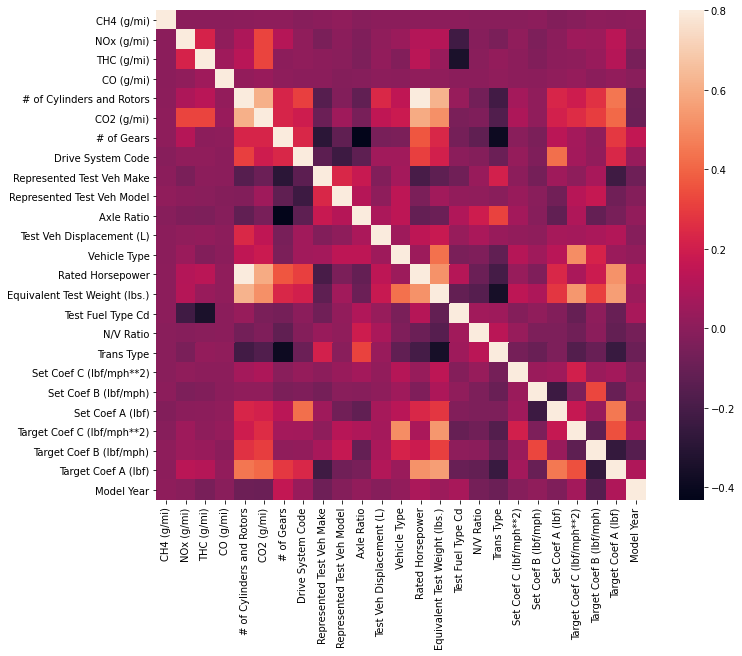

In [32]:
#correlation matrix
corrmat = mod_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

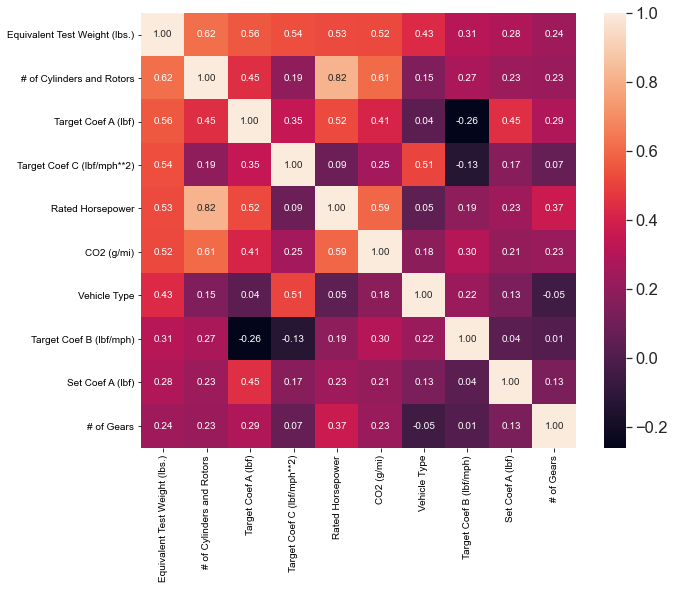

In [33]:
# Checking top 10 correlated variables

k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Equivalent Test Weight (lbs.)')['Equivalent Test Weight (lbs.)'].index
cm = np.corrcoef(mod_df[cols].values.T)
f, ax = plt.subplots(figsize=(10, 8))
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [34]:
#Checking correlation w.r.t. target variable

corrmat.loc['Equivalent Test Weight (lbs.)',].sort_values(ascending=False)

Equivalent Test Weight (lbs.)    1.000000
# of Cylinders and Rotors        0.620861
Target Coef A (lbf)              0.557265
Target Coef C (lbf/mph**2)       0.537227
Rated Horsepower                 0.525755
CO2 (g/mi)                       0.518013
Vehicle Type                     0.433744
Target Coef B (lbf/mph)          0.309730
Set Coef A (lbf)                 0.282367
# of Gears                       0.236039
Drive System Code                0.204284
Test Veh Displacement (L)        0.172837
Set Coef C (lbf/mph**2)          0.145908
NOx (g/mi)                       0.119388
Set Coef B (lbf/mph)             0.095089
Represented Test Veh Model       0.062943
Model Year                       0.046468
THC (g/mi)                       0.039622
CO (g/mi)                        0.012446
CH4 (g/mi)                       0.003087
Axle Ratio                      -0.089977
Test Fuel Type Cd               -0.114890
Represented Test Veh Make       -0.129121
N/V Ratio                       -0

##### Key Observations:

According to our crystal ball, these are the variables most correlated with 'Equivalent Test Weight (lbs.)'. My thoughts on this: Divide in 4 Groups

1 to 0.7 - Very Strong Correlation

0.7 to 0.5 - Strong Correlation

0.5 to 0.3 - Mild Correlation

<0.3 - Low Correlation

- '# of Cylinders and Rotors',Target Coef A (lbf) and Target Coef C (lbf/mph^2) are Positvely correlated
- Mild negative correlation for Trans Type

# 7. Multicollinearity Check - Variance Inflation Factor (VIF) ##

In [35]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [36]:
X = mod_df.drop(['Equivalent Test Weight (lbs.)'], axis=1)
calc_vif(X)

,variables,VIF
0,CH4 (g/mi),1.002451
1,NOx (g/mi),1.688672
2,THC (g/mi),1.663727
3,CO (g/mi),1.014244
4,# of Cylinders and Rotors,43.550293
5,CO2 (g/mi),20.932030
6,# of Gears,14.978351
7,Drive System Code,8.461359
8,Represented Test Veh Make,3.873325
9,Represented Test Veh Model,4.790397


#### VIF>5 indicates a strong correlation due to presence of collinear variables. We can exclude features from our model as an alternative model to compare the results against the original model (where we will keep all these columns)

# 8. Outlier Detection

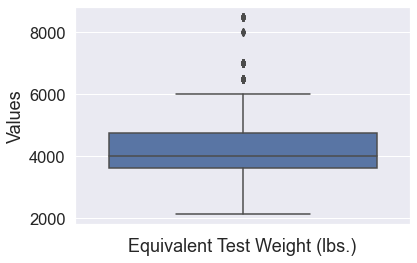

In [37]:
sns.boxplot(mod_df['Equivalent Test Weight (lbs.)'], orient = 'v')
plt.xlabel('Equivalent Test Weight (lbs.)')
plt.ylabel('Values')
plt.show()

#### We will be using XGBoost which is a Tree-Based algorithm and is unaffected of outliers. Hence, we will keep outliers as it is and they wouldn't impact our results.

# 9. Model Development & Results

In [38]:
# Creating a separate copy for model development

model_df = mod_df.copy()

In [39]:
# Splitting dependent and independent features

X = model_df.drop(['Equivalent Test Weight (lbs.)'], axis=1)
y = model_df['Equivalent Test Weight (lbs.)']

### Important Features Checkpoint

In [40]:
# extratreesclassifier for feature selection

from sklearn.ensemble import ExtraTreesClassifier

model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

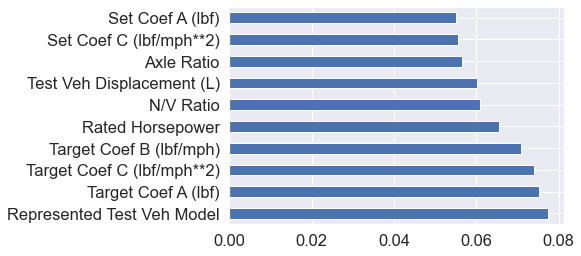

In [41]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

**Below features came out to be the most important ones:**

1) Represented Test Veh Model

2) Target Coef A (lbf)

3) Target Coef C (lbf/mph**2)

4) Target Coef B (lbf/mph)

**We will now build our model using XGBoost and will check the important features to confirm.**

### Model Preparation 

In [42]:
# split dataset into train test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(42316, 24) (10579, 24) (42316,) (10579,)


In [43]:
## Hyper Parameter Optimization Grid

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
 "max_depth"        : [1, 3, 4, 5, 6, 7],
 "n_estimators"     : [int(x) for x in np.linspace(start=100, stop=2000, num=10)],
 "min_child_weight" : [int(x) for x in np.arange(3, 15, 1)],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
 "subsample"        : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
 "colsample_bytree" : [0.5, 0.6, 0.7, 0.8, 0.9, 1],
 "colsample_bylevel": [0.5, 0.6, 0.7, 0.8, 0.9, 1],  
 
}

In [44]:
reg = xgb.XGBRegressor() #xgb_regressor object

In [45]:
# RandomizedSearch CV
    
model  = RandomizedSearchCV(    
                reg,
                param_distributions=params,
                n_iter=10,
                n_jobs=-1,
                cv=5,
                verbose=3,
)

In [46]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 38.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_...
                                                  0.6, 0.7, 0.8, 0.9, 1],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                    

### Model Score

In [47]:
print(f"Model Best Score : {model.best_score_}")
print(f"Model Best Parameters : {model.best_estimator_.get_params()}")

Model Best Score : 0.9970038372312959
Model Best Parameters : {'objective': 'reg:squarederror', 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 0.8, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 1, 'gpu_id': -1, 'importance_type': 'gain', 'interaction_constraints': '', 'learning_rate': 0.15, 'max_delta_step': 0, 'max_depth': 6, 'min_child_weight': 6, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 2000, 'n_jobs': 4, 'num_parallel_tree': 1, 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 0.7, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}


In [48]:
model.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
             colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.15, max_delta_step=0, max_depth=6,
             min_child_weight=6, missing=nan, monotone_constraints='()',
             n_estimators=2000, n_jobs=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

### Let's check the Important Features based on F-Score

In [49]:
# taking parameters from the best estimator
xgb_params = {
   'max_depth': 7,
    'subsample': 1,
    'colsample_bytree': 0.6,
    'objective': 'reg:squarederror',
    'seed' : 0
}

dtrain = xgb.DMatrix(X_train, y_train, feature_names=X_train.columns.values)
model_1 = xgb.train(dict(xgb_params), dtrain, num_boost_round=50)

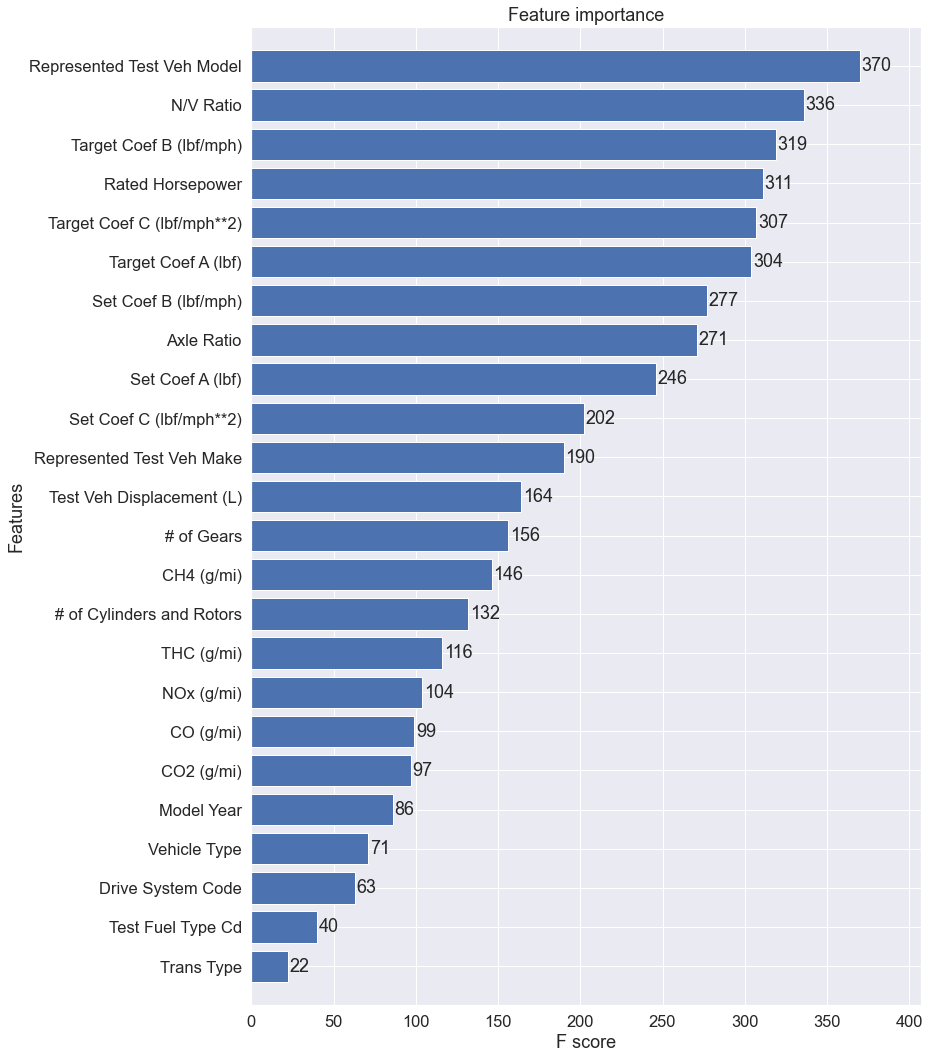

In [50]:
# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model_1, max_num_features=50, height=0.8, ax=ax)
plt.show()

**Below features came out to be the most important ones:**

1) Represented Test Veh Model

2) N/V Ratio

3) Target Coef B (lbf/mph)

4) Rated Horsepower

5) Target Coef C (lbf/mph**2)

6) Target Coef A (lbf)

These are the same features which our earlier **ExtraTreesClassifier()** predicted. Hence, our model results are consistent.

### Evaluation Metric Result ###

In [51]:
pred_train = model.predict(X_train)

In [52]:
pred = model.predict(X_test)

In [53]:
# Train RMSE Computation 
rmse = np.sqrt(mean_squared_error(y_train, pred_train)) 

print("RMSE : % f" %(rmse))

RMSE :  10.464774


In [54]:
# Test RMSE Computation 
rmse = np.sqrt(mean_squared_error(y_test, pred))

print("RMSE : % f" %(rmse))

RMSE :  37.536445


In [55]:
y_test.mean()

4216.271670290197

## Findings

####  We have a weight error of ~37 lbs of automobiles whose average equivalent weight is 4216 lbs. Prediction error looks reasonable, but can be worked upon to reduce further. ####

##### As per the model instructions, below Factors should be included in the model building :

1) Vehicle Footprint or Pan Area

2) Year

3) Fuel Type (Hint: Diesel Engines weigh more than gasoline engines)

4) Drive Type: Four Wheel Drive (FWD), Rear Wheel Drive (RWD), Four Wheel Drive (4WD), All Wheel Drive (AWD)

5) Transmission Type: Manual, Semi-Automatic, Automatic, Dual Clutch Transmission (DCT), etc

##### We dropped 'Vehicle Footprint or Pan Area' fields like vehicle length (VEHLEN) and width(VEHWID) due to high % of missing values. In the 2nd iteration of our model, we will include these 2 fields and compare the results.  

# 2nd Iteration of Model

In [56]:
updated_cols = [col for col in mod_df.columns if col not in excl_cols]
updated_cols.extend(['VEHLEN','VEHWID'])

In [57]:
mod_df_updated = new_df[updated_cols]
mod_df_updated.head()

,CH4 (g/mi),NOx (g/mi),THC (g/mi),CO (g/mi),# of Cylinders and Rotors,CO2 (g/mi),# of Gears,Drive System Code,Represented Test Veh Make,Represented Test Veh Model,Axle Ratio,Test Veh Displacement (L),Vehicle Type,Rated Horsepower,Equivalent Test Weight (lbs.),Test Fuel Type Cd,N/V Ratio,Trans Type,Set Coef C (lbf/mph**2),Set Coef B (lbf/mph),Set Coef A (lbf),Target Coef C (lbf/mph**2),Target Coef B (lbf/mph),Target Coef A (lbf),Model Year,VEHLEN,VEHWID
0,0.0076,0.0249,0.024700,0.418000,12.0,466.87,8,R,ASTON MARTIN,DB11,2.70,5.2,Car,600,4500,61,22.2,A,0.0245,0.0807,6.81,0.0271,0.0169,40.94,2020,NaN,NaN
1,NaN,0.0110,0.001155,0.067334,12.0,285.00,8,R,ASTON MARTIN,DB11,2.70,5.2,Car,600,4500,61,22.2,A,0.0245,0.0807,6.81,0.0271,0.0169,40.94,2020,NaN,NaN
2,0.0054,0.0290,0.026500,0.070000,8.0,386.66,8,R,ASTON MARTIN,DB11 V8,2.70,4.0,Car,503,4500,61,22.2,A,0.0251,0.0919,11.26,0.0271,0.0169,40.94,2020,NaN,NaN
3,NaN,0.0020,0.000500,0.030000,8.0,259.74,8,R,ASTON MARTIN,DB11 V8,2.70,4.0,Car,503,4500,61,22.2,A,0.0251,0.0919,11.26,0.0271,0.0169,40.94,2020,NaN,NaN
4,0.0109,0.0262,0.042200,0.984800,12.0,499.69,8,R,ASTON MARTIN,DBS,2.93,5.2,Car,715,4500,61,23.0,A,0.0245,0.0807,6.81,0.0271,0.0169,40.94,2020,NaN,NaN


In [58]:
missing_info(mod_df_updated).head(9)

,Total Missing,Missing %
VEHWID,46259,87.5
VEHLEN,46259,87.5
CH4 (g/mi),12839,24.3
NOx (g/mi),5015,9.5
THC (g/mi),4638,8.8
CO (g/mi),4542,8.6
# of Cylinders and Rotors,3055,5.8
CO2 (g/mi),2360,4.5
Target Coef A (lbf),0,0.0


In [59]:
# missing value imputation

mod_df_updated['CH4 (g/mi)'].fillna(mod_df_updated['CH4 (g/mi)'].median(), inplace=True)
mod_df_updated['NOx (g/mi)'].fillna(mod_df_updated['NOx (g/mi)'].median(), inplace=True)
mod_df_updated['THC (g/mi)'].fillna(mod_df_updated['THC (g/mi)'].median(), inplace=True)
mod_df_updated['CO (g/mi)'].fillna(mod_df_updated['CO (g/mi)'].median(), inplace=True)
mod_df_updated['# of Cylinders and Rotors'].fillna(mod_df_updated['# of Cylinders and Rotors'].median(), inplace=True)
mod_df_updated['CO2 (g/mi)'].fillna(mod_df_updated['CO2 (g/mi)'].median(), inplace=True)
mod_df_updated['VEHWID'].fillna(mod_df_updated['VEHWID'].median(), inplace=True)
mod_df_updated['VEHLEN'].fillna(mod_df_updated['VEHLEN'].median(), inplace=True)

In [60]:
labelencoder1 = LabelEncoder()

# Assigning numerical values and storing in same column
mod_df_updated['Drive System Code'] = labelencoder1.fit_transform(mod_df_updated['Drive System Code'])
mod_df_updated['Represented Test Veh Make'] = labelencoder1.fit_transform(mod_df_updated['Represented Test Veh Make'])
mod_df_updated['Represented Test Veh Model'] = labelencoder1.fit_transform(mod_df_updated['Represented Test Veh Model'])
mod_df_updated['Vehicle Type'] = labelencoder1.fit_transform(mod_df_updated['Vehicle Type'])
mod_df_updated['Trans Type'] = labelencoder1.fit_transform(mod_df_updated['Trans Type'])

In [61]:
X1 = mod_df_updated.drop(['Equivalent Test Weight (lbs.)'], axis=1)
y1 = mod_df_updated['Equivalent Test Weight (lbs.)']

In [62]:
# split dataset into train test sets

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

print(X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape)

(42316, 26) (10579, 26) (42316,) (10579,)


In [63]:
model.fit(X1_train, y1_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 18.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 35.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_...
                                                  0.6, 0.7, 0.8, 0.9, 1],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                    

In [64]:
# predict test set
pred1 = model.predict(X1_test)

In [65]:
#test RMSE
rmse = np.sqrt(mean_squared_error(y1_test, pred1))

print("RMSE : % f" %(rmse))

RMSE :  42.724862


In [66]:
y1_test.mean()

4216.271670290197

In [67]:
# predict train set
pred_train1 = model.predict(X1_train)

In [68]:
# Train RMSE Computation 
rmse = np.sqrt(mean_squared_error(y1_train, pred_train1)) 

print("RMSE : % f" %(rmse))

RMSE :  11.899305


# Conclusion

####  We have a weight deviation of ~43 lbs of automobiles whose average equivalent weight is 4216 lbs. This is slightly higher than our earlier model iteration where we haven't included "Vehicle Footprint or Pan Area" fields. ####

 ---------------------------------------------THANK YOU-------------------------------------------